# Flat DataFrame Creation

In [1]:
import os

path_data = {}

path_data["train"] = [os.path.join(root, file) for root, dirs, files in os.walk(
    "DataSet/trainset") for file in files]  # all train csv file paths
path_data["val"] = [os.path.join(root, file) for root, dirs, files in os.walk(
    "DataSet/validationset") for file in files]  # all val csv file paths
path_data["test"] = [os.path.join(root, file) for root, dirs, files in os.walk(
    "DataSet/testset") for file in files]  # all test csv file paths

In [2]:
import pandas as pd
import numpy as np

# combined list of all paths
all_paths = path_data["train"] + path_data["val"] + path_data["test"]

# dframe to store all X data
X = pd.DataFrame(columns=["filepath", "user_id", "time", "indicator1", "indicator2", "indicator3", 
                          "indicator4", "indicator5", "indicator6", "indicator7", "indicator8"])
# array to store all y data
y = []

for user_idx, f_path in enumerate(all_paths):
    data_df = pd.read_csv(f_path).iloc[:, 3:]  # gets X data for current user csv (excluding first 3 columns)
    data_df["filepath"] = f_path  # adds file path to df
    data_df["user_id"] = int(user_idx)  # adds unique user id
    data_df['time'] = data_df.index  # gets index as time stamp (tsfresh)
    X = pd.concat([X, data_df])  # adds to X dframe
    
    # gets y variable from file path
    if "UGE" in f_path:
        y.append(1)
    elif "UBE" in f_path:
        y.append(0)
    
X = X.infer_objects()  # infers dtypes of X dframe
y = np.array(y)  # converts y list to ndarray

In [9]:
X

,filepath,user_id,time,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8
0,DataSet/trainset/UGE/user1.csv,0,0,46.0,910.5,3.50,47.67,48.0,52.0,0.2745,0.0750
1,DataSet/trainset/UGE/user1.csv,0,1,0.0,0.0,0.00,0.00,0.0,0.0,0.0000,0.4286
2,DataSet/trainset/UGE/user1.csv,0,2,5.0,6.0,2.67,4.67,0.0,4.0,0.0000,0.0000
3,DataSet/trainset/UGE/user1.csv,0,3,46.0,1971.0,7.33,46.00,7.0,46.0,0.1000,0.0000
4,DataSet/trainset/UGE/user1.csv,0,4,25.0,3.0,9.00,25.00,3.0,48.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
23958,DataSet/testset/UBE/user248.csv,499,23958,21.0,130.0,1.00,21.00,63.0,21.0,0.1538,0.0000
23959,DataSet/testset/UBE/user248.csv,499,23959,0.0,0.0,0.00,160.00,62.0,22.0,0.0000,0.0000
23960,DataSet/testset/UBE/user248.csv,499,23960,4.0,249.0,5.00,5.00,252.0,5.0,0.0000,0.0000
23961,DataSet/testset/UBE/user248.csv,499,23961,11.0,65.0,8.00,10.00,42.0,33.0,0.0526,0.0000


In [10]:
y.shape

(500,)

# TSFresh Feature Extraction

In [11]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

extracted_features = extract_features(X.iloc[:, 1:],  # process without filepath column
                                      column_id="user_id",
                                      column_sort="time",
                                      default_fc_parameters=EfficientFCParameters(),  # efficient parameters to cut down computation time
                                      impute_function=impute)

Feature Extraction: 100%|██████████| 20/20 [3:03:53<00:00, 551.68s/it]  


In [12]:
extracted_features.head()

,indicator1__variance_larger_than_standard_deviation,indicator1__has_duplicate_max,indicator1__has_duplicate_min,indicator1__has_duplicate,indicator1__sum_values,indicator1__abs_energy,indicator1__mean_abs_change,indicator1__mean_change,indicator1__mean_second_derivative_central,indicator1__median,...,indicator8__permutation_entropy__dimension_6__tau_1,indicator8__permutation_entropy__dimension_7__tau_1,indicator8__query_similarity_count__query_None__threshold_0.0,"indicator8__matrix_profile__feature_""min""__threshold_0.98","indicator8__matrix_profile__feature_""max""__threshold_0.98","indicator8__matrix_profile__feature_""mean""__threshold_0.98","indicator8__matrix_profile__feature_""median""__threshold_0.98","indicator8__matrix_profile__feature_""25""__threshold_0.98","indicator8__matrix_profile__feature_""75""__threshold_0.98",indicator8__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,1.0,1.0,56425.82,4.426622e+06,20.551836,-0.005151,0.013581,23.730,...,4.655726,5.615643,0.0,2.492759,5.152150,4.230855,4.275636,4.004746,4.520421,0.472286
1,1.0,0.0,1.0,1.0,278008.73,1.055541e+09,24.881250,0.000334,0.000204,16.600,...,1.417866,1.709721,0.0,4.974313,19.317951,16.271742,17.079996,15.681324,17.894127,0.473700
2,1.0,0.0,1.0,1.0,313018.09,2.143141e+10,84.307619,0.001619,-0.000081,12.000,...,2.261113,2.734030,0.0,4.694198,24.345355,20.799397,21.931388,19.671169,22.981645,0.464629
3,1.0,0.0,1.0,1.0,756723.16,3.622832e+09,45.872286,-0.000736,0.000177,13.175,...,2.818944,3.434586,0.0,3.387850,13.842438,10.034405,10.354981,8.872922,11.497783,0.471629
4,1.0,0.0,1.0,1.0,317934.10,4.079412e+08,10.449819,0.000205,0.000105,10.000,...,0.343271,0.409839,0.0,25.598598,79.276272,70.001092,71.419660,68.540246,75.580976,0.419714


In [13]:
extracted_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Columns: 6264 entries, indicator1__variance_larger_than_standard_deviation to indicator8__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(6264)
memory usage: 23.9 MB


In [16]:
extracted_features.to_pickle("tsfresh_extracted_features.pickle")

In [17]:
np.save("y.npy", y)

# Min-Max Normalization + PCA + XGBoost

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_rescaled = pd.DataFrame(scaler.fit_transform(extracted_features.values),
                             columns=extracted_features.columns,
                             index=extracted_features.index)

In [9]:
data_rescaled.head()

,indicator1__variance_larger_than_standard_deviation,indicator1__has_duplicate_max,indicator1__has_duplicate_min,indicator1__has_duplicate,indicator1__sum_values,indicator1__abs_energy,indicator1__mean_abs_change,indicator1__mean_change,indicator1__mean_second_derivative_central,indicator1__median,...,indicator8__permutation_entropy__dimension_6__tau_1,indicator8__permutation_entropy__dimension_7__tau_1,indicator8__query_similarity_count__query_None__threshold_0.0,"indicator8__matrix_profile__feature_""min""__threshold_0.98","indicator8__matrix_profile__feature_""max""__threshold_0.98","indicator8__matrix_profile__feature_""mean""__threshold_0.98","indicator8__matrix_profile__feature_""median""__threshold_0.98","indicator8__matrix_profile__feature_""25""__threshold_0.98","indicator8__matrix_profile__feature_""75""__threshold_0.98",indicator8__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,0.001491,0.000001,0.001747,0.633104,0.601000,0.964634,...,1.000000,0.999872,0.0,0.020688,0.000000,0.001627,0.002156,0.008936,0.000000,0.963355
1,0.0,0.0,0.0,0.0,0.010295,0.000423,0.002496,0.636331,0.589862,0.674797,...,0.258607,0.259065,0.0,0.073231,0.191109,0.184404,0.192445,0.188252,0.188202,0.966398
2,0.0,0.0,0.0,0.0,0.011686,0.008594,0.012773,0.637088,0.589625,0.487805,...,0.451691,0.453338,0.0,0.067300,0.258933,0.253132,0.264543,0.249523,0.259796,0.946877
3,0.0,0.0,0.0,0.0,0.029316,0.001452,0.006126,0.635702,0.589840,0.535569,...,0.579421,0.586207,0.0,0.039640,0.117240,0.089723,0.092503,0.083696,0.098189,0.961940
4,0.0,0.0,0.0,0.0,0.011881,0.000163,0.000000,0.636256,0.589780,0.406504,...,0.012551,0.012526,0.0,0.509916,1.000000,1.000000,1.000000,1.000000,1.000000,0.850221


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
reduced_data = pd.DataFrame(pca.fit_transform(data_rescaled))

In [11]:
reduced_data.head()

,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
0,-2.807754,7.440907,-0.815869,-0.439749,-1.426105,0.242502,-0.873420,-2.419549,-0.229877,-1.521098,...,0.098187,-0.230196,-0.077105,-0.171003,0.131415,0.253203,-0.068374,-0.123570,0.138515,0.016328
1,-0.965371,-1.275940,-0.304597,1.557731,2.020738,0.935260,-0.445157,-0.959989,-0.428479,0.588195,...,-0.053281,-0.116708,-0.397323,0.146243,-0.484180,-0.041699,-0.259792,0.065241,0.159608,0.198640
2,-2.083449,-0.538107,-0.692834,-1.005171,-0.149181,-0.471003,0.982248,0.719359,-0.542210,0.963567,...,-0.463765,0.252247,-0.347563,0.134395,0.033100,0.477932,-0.783488,-0.579967,0.455436,-0.269294
3,3.620660,0.593077,-2.004116,-0.924186,2.583687,-1.813259,1.474960,0.510154,-1.203398,-0.341663,...,0.489312,0.160999,0.183339,-0.080155,-0.019301,-0.219447,0.289238,-0.063536,0.124992,0.048613
4,0.516761,-4.806533,-2.633240,-1.492718,0.011556,-0.924506,-0.138663,-1.501699,-0.078190,-1.570128,...,0.384089,-0.370144,-0.068806,0.144788,0.087065,0.080677,0.226720,-0.018547,-0.271097,0.068348


In [134]:
X_train = reduced_data.iloc[:300, :]
X_val = reduced_data.iloc[300:400, :]
X_test = reduced_data.iloc[400:500, :]

y_train = y[:300]
y_val = y[300:400]
y_test = y[400:500]

In [139]:
from xgboost import XGBClassifier

# xgboost baseline
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [141]:
# predictions on validation set
y_infer = model.predict(X_test, ntree_limit = model.best_ntree_limit)

# validation set classification report
print(classification_report(y_test, y_infer))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        50
           1       0.64      0.68      0.66        50

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



/opt/conda/lib/python3.8/site-packages/xgboost/core.py:91: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [142]:
# save model to JSON
model.save_model("tsfresh_xgboost_baseline_pca.json")

# Best Result

Result differs slightly from the run above because of the random component of svd_solver in PCA.

In [3]:
import pandas as pd

extracted_features = pd.read_pickle("tsfresh_extracted_features.pickle")

In [6]:
import numpy as np

y = np.load("y.npy")

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_rescaled = pd.DataFrame(scaler.fit_transform(extracted_features.values),
                             columns=extracted_features.columns,
                             index=extracted_features.index)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
reduced_data = pd.DataFrame(pca.fit_transform(data_rescaled))

In [7]:
X_train = reduced_data.iloc[:300, :]
X_val = reduced_data.iloc[300:400, :]
X_test = reduced_data.iloc[400:500, :]

y_train = y[:300]
y_val = y[300:400]
y_test = y[400:500]

In [1]:
from xgboost import XGBClassifier

# xgboost baseline
model = XGBClassifier()

model.load_model("tsfresh_xgboost_baseline_pca.json")

In [9]:
from sklearn.metrics import classification_report

# predictions on validation set
y_infer = model.predict(X_test, ntree_limit = model.best_ntree_limit)

# validation set classification report
print(classification_report(y_test, y_infer))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        50
           1       0.67      0.66      0.67        50

    accuracy                           0.67       100
   macro avg       0.67      0.67      0.67       100
weighted avg       0.67      0.67      0.67       100



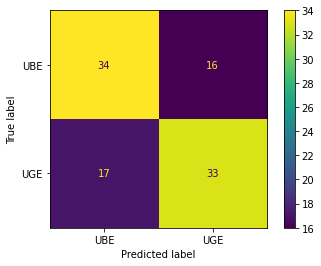

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_infer)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["UBE", "UGE"])
disp.plot()
plt.show()